In [133]:
import requests
import bs4
from bs4 import BeautifulSoup
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt




In [134]:
cardClass = '_1xHGtK'
nameCard='_2WkVRV'
descriptionClass='IRpwTa'
priceClass="_30jeq3"
imageClass='CXW8mj'

itemName ='%20'.join(input().split())


In [135]:
itemName= 'pants'
itemName='%20'.join(itemName.strip().split())


In [136]:
keyWords=[]

In [137]:
itemPage=requests.get(f'https://www.flipkart.com/search?q={itemName}').content
idk = BeautifulSoup(itemPage,'html.parser')


In [138]:

def setlist(item,nameCard):
    name=item.find('div',class_=nameCard).text
    dis=item.find('a',class_=descriptionClass)['title']
    price=item.find('div',class_=priceClass).text[1:]
    price=''.join(price.split(','))
    keyWords.extend(dis.split())
    return [name,dis,int(price)]
    

In [139]:
file=open('temp.txt','w')

In [140]:
itemCards=idk.find_all('div',class_=cardClass)


In [141]:
itemList = [setlist(item,nameCard) for item in itemCards]
print(itemList)
table=pd.DataFrame(itemList)
table.sort_values(2)
table.to_excel('data.xlsx')
print(keyWords)


[['pesado', 'Men Slim Fit Beige Lycra Blend Trousers', 489], ['LEE TEX', 'Women Regular Fit Black, Light Green Cotton Blend Trousers', 649], ['Roadster', 'Men Regular Fit Grey Cotton Blend Trousers', 787], ['PETER ENGLAND', 'Men Slim Fit Black Cotton Blend Trousers', 1259], ['Raymond', 'Men Slim Fit Black Viscose Rayon Trousers', 944], ['PETER ENGLAND', 'Men Slim Fit Grey Polyester Viscose Blend Trousers', 1169], ['U.S. POLO ASSN.', 'Men Slim Fit Multicolor Cotton Blend Trousers', 1481], ['PARK AVENUE', 'Men Regular Fit Blue Cotton Blend Trousers', 1449], ['Roadster', 'Men Regular Fit Grey Pure Cotton Trousers', 1649], ['Foxter', 'Pack of 2 Women Regular Fit Multicolor Cotton Blend Trousers', 699], ['LEE TEX', 'Women Regular Fit Black, White Cotton Blend Trousers', 649], ['LEE TEX', 'Pack of 2 Women Regular Fit Maroon Cotton Blend Trousers', 449], ['KOTTY', 'Women Regular Fit Black Viscose Rayon Trousers', 399], ['KOTTY', 'Women Regular Fit Dark Green Viscose Rayon Trousers', 399], ['F

Hey its time for visualizations


(-0.5, 999.5, 999.5, -0.5)

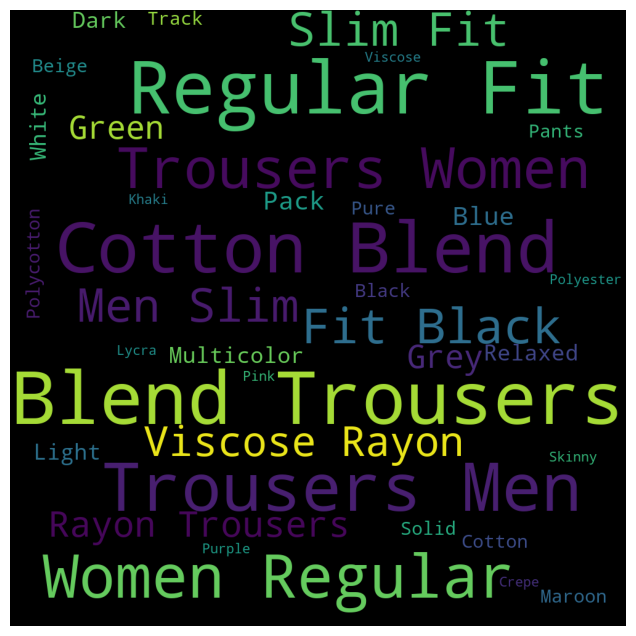

In [142]:
wordcloud = WordCloud(width = 1000, height = 1000).generate(' '.join(keyWords))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")



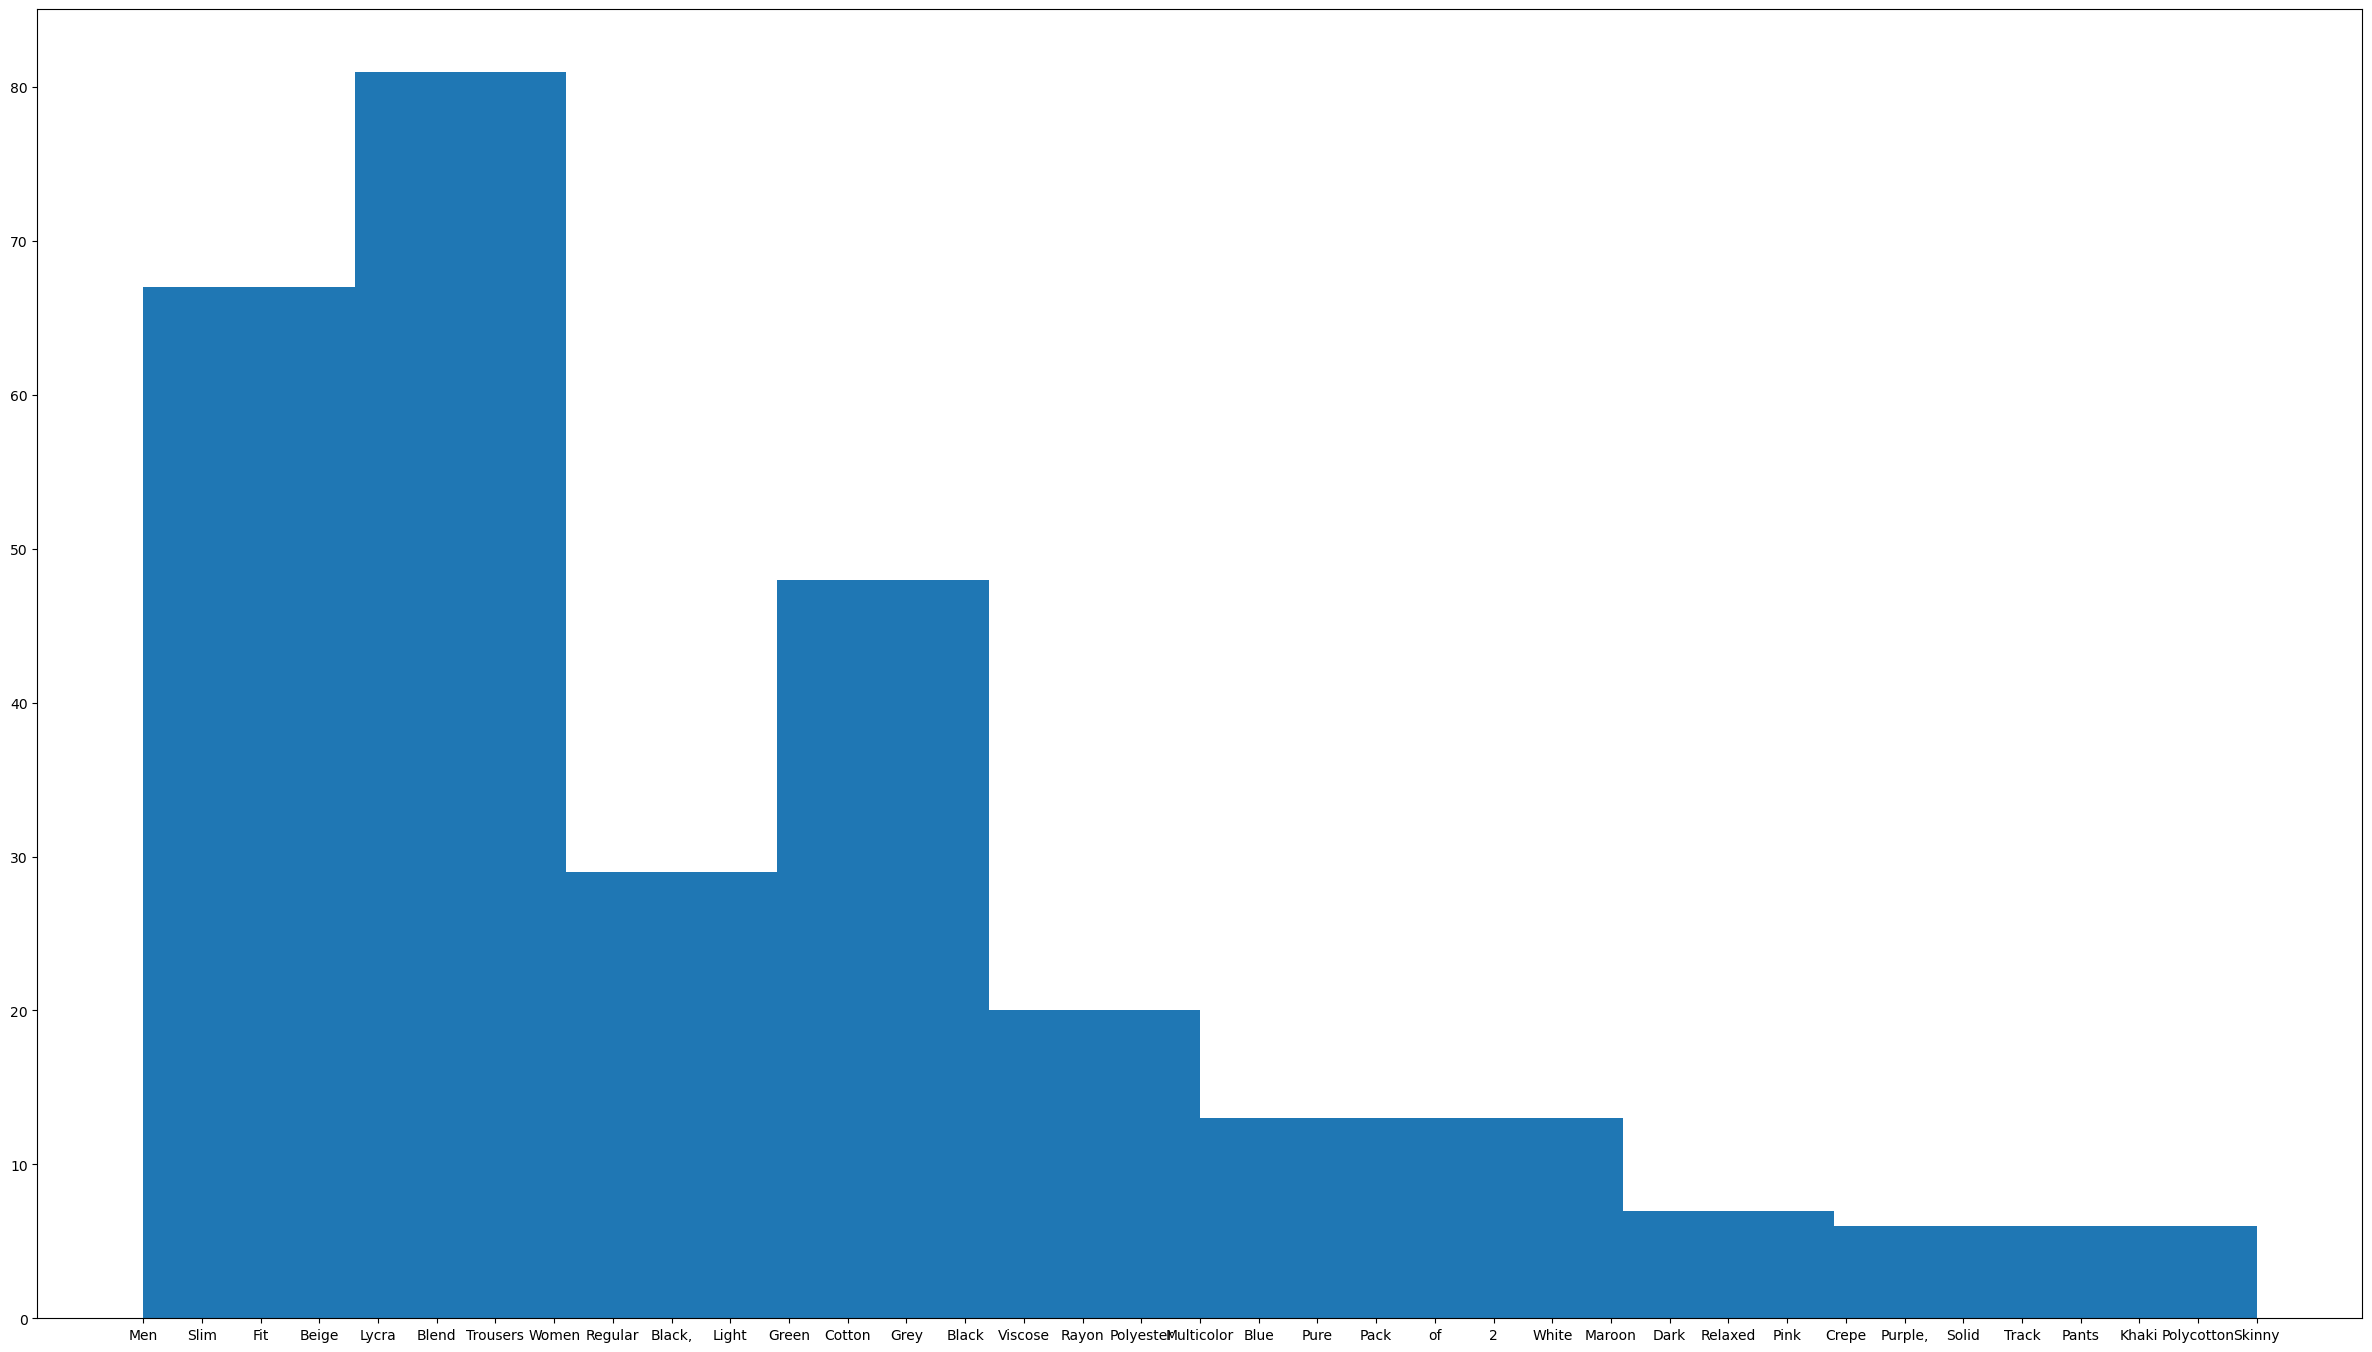

In [143]:
fig, ax = plt.subplots(figsize=(30, 17))
ax.hist(keyWords)
plt.show()


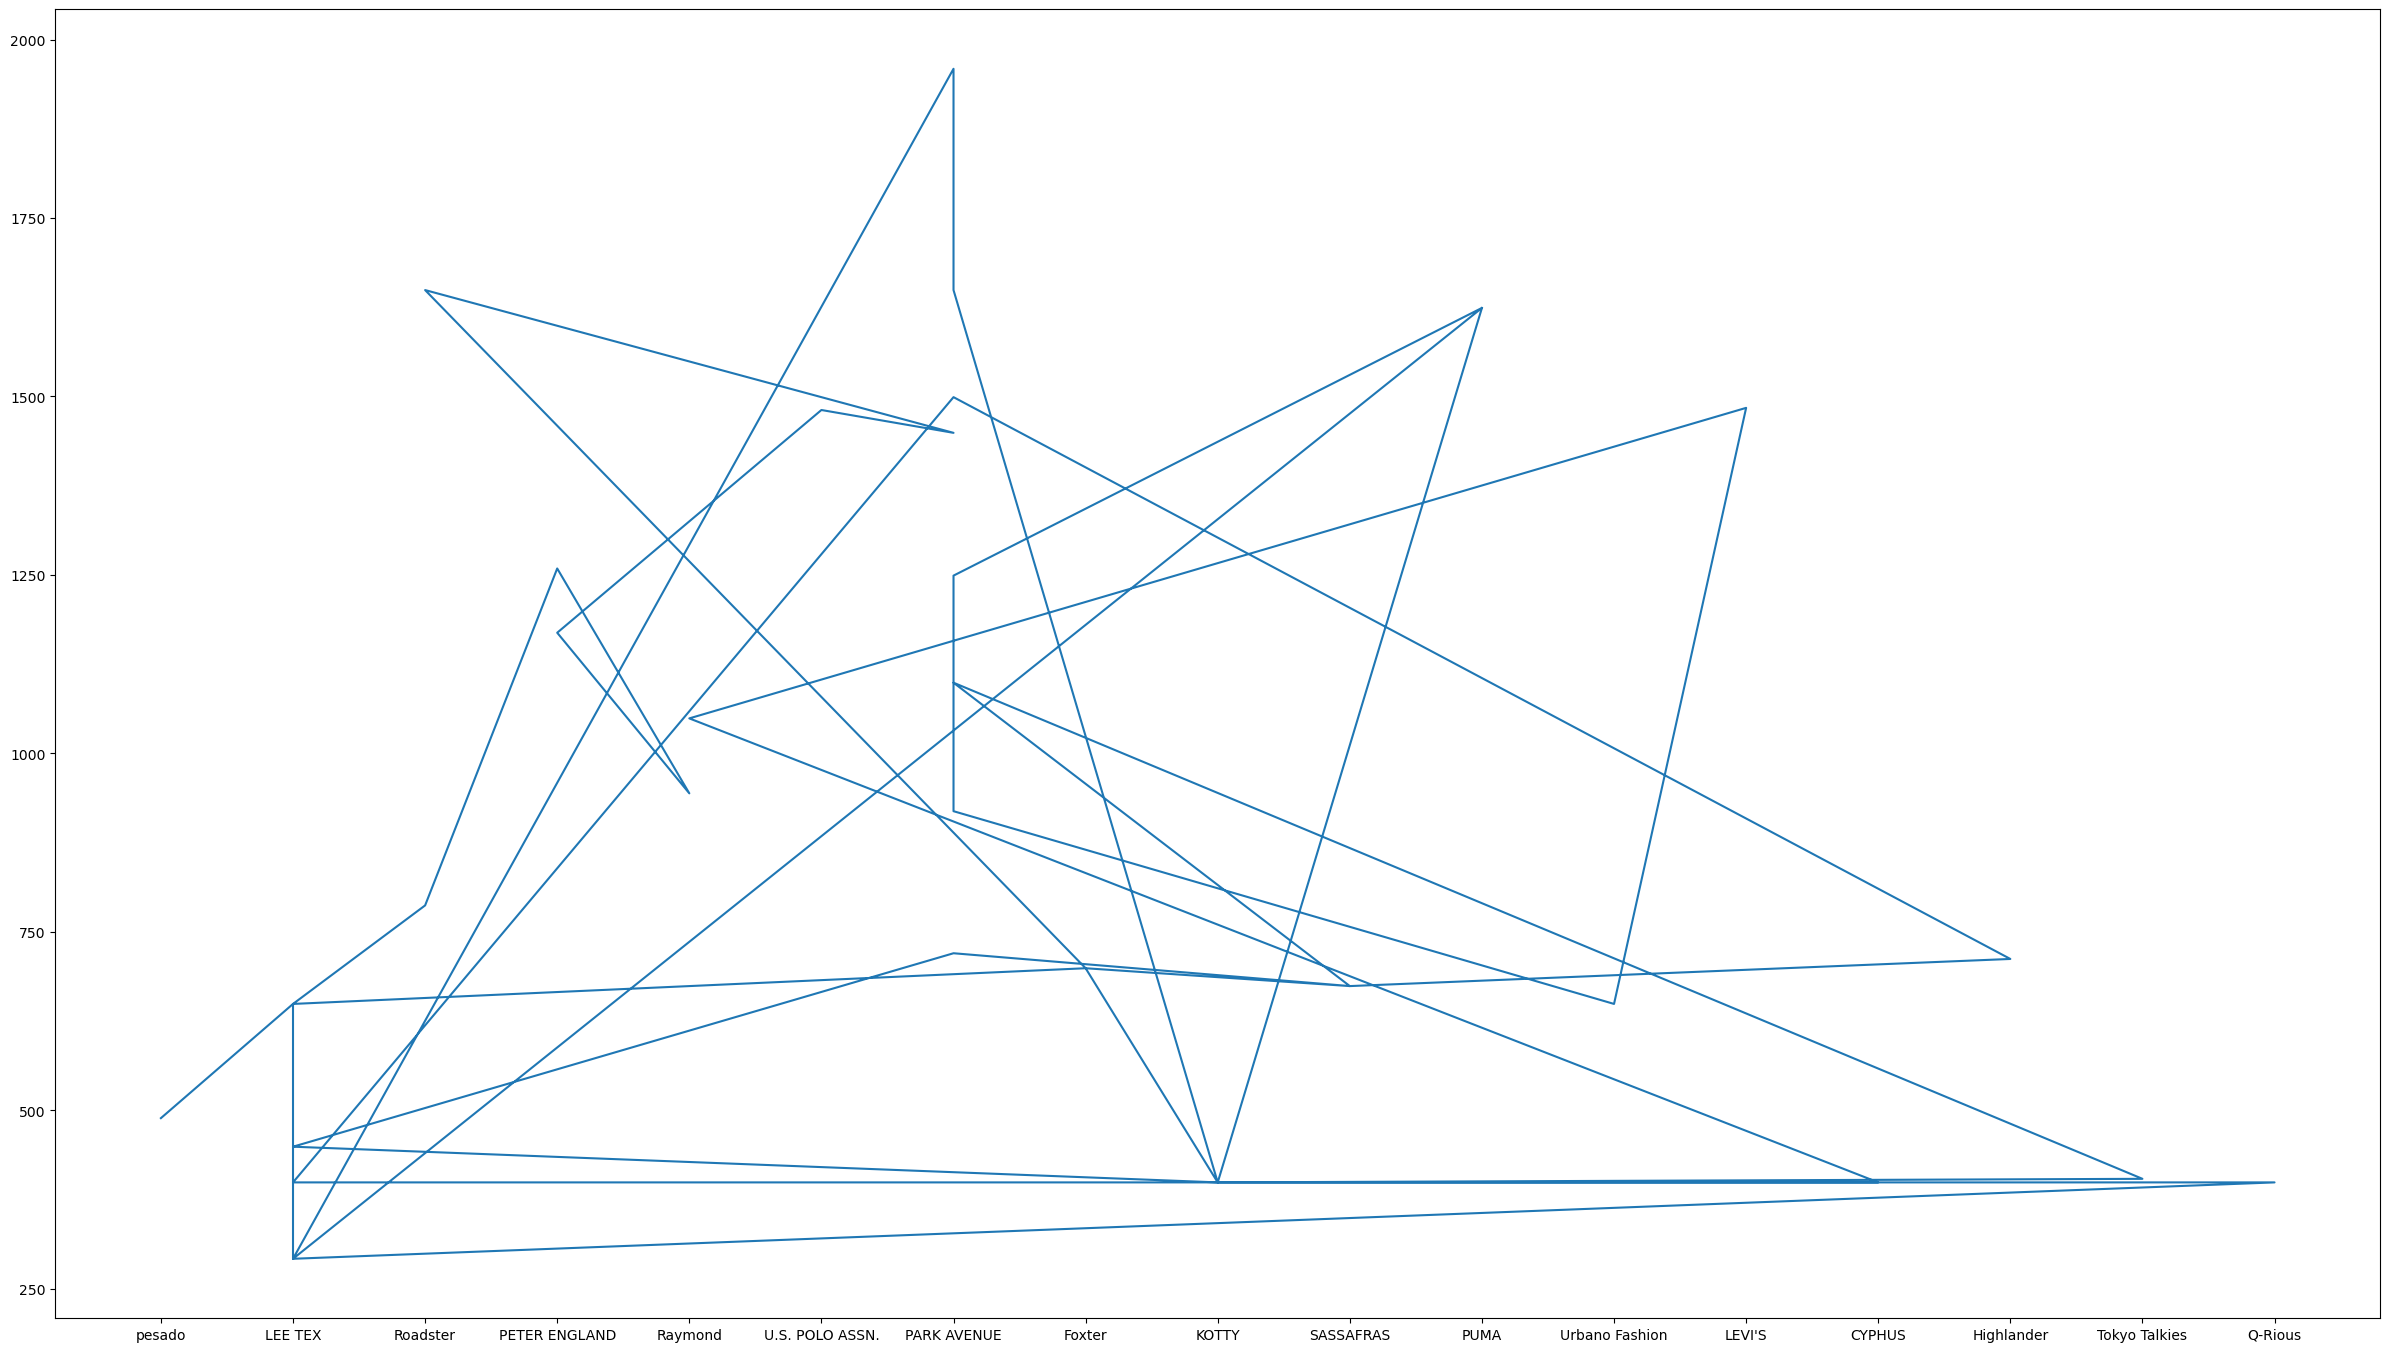

In [144]:
fig, ax = plt.subplots(figsize=(30, 17))
plt.plot(list(table.iloc[:,0]),list(table.iloc[:,2]))

